## California Housing Prices (regression), dataset evaluation report

#### (https://www.kaggle.com/datasets/camnugent/california-housing-prices)
Target variable is "median_house_value" (continuous, regression).
Price range is 14 999 - 500 001 USD.
Total amount of rows - 20640.

### Level 1 of Exercise project
#### I optimized the housing data and used 3 different versions of it in ML algorithms:
#### 1. "processed_regression_housing.csv" after dropping rows with median_house_value > 500 001 - 16646 rows
#### 2. "housing_pre_target_trim.csv"  without dropping rows with median_house_value > 500 001 - 20433 rows
#### 3. "housing_before_optimization.csv" before RANSAC + MAD + Isolation Forest optimization.  - 19475 rows

#### Here you can see distribution before dropping median_house_value > 500 001:
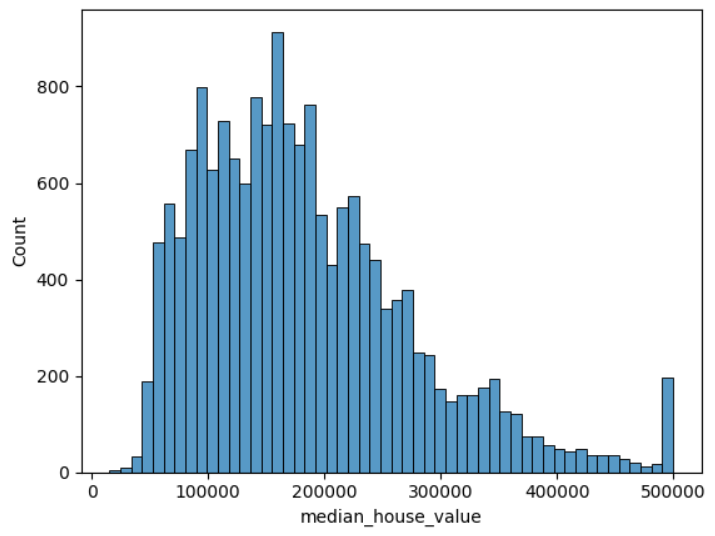
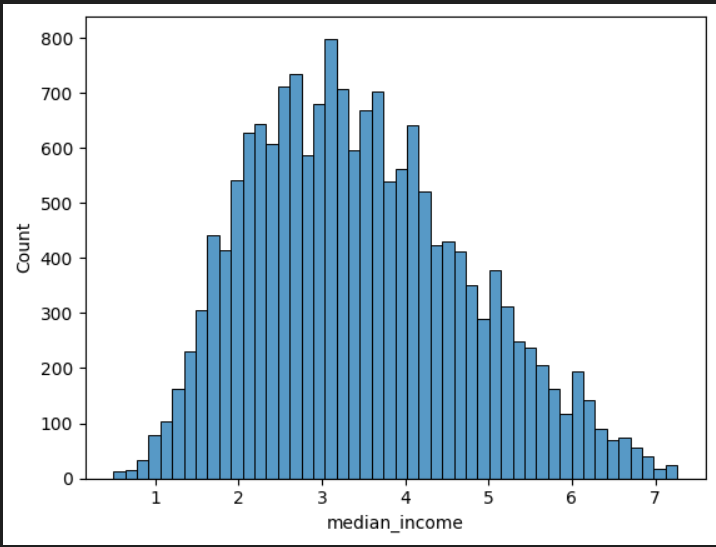
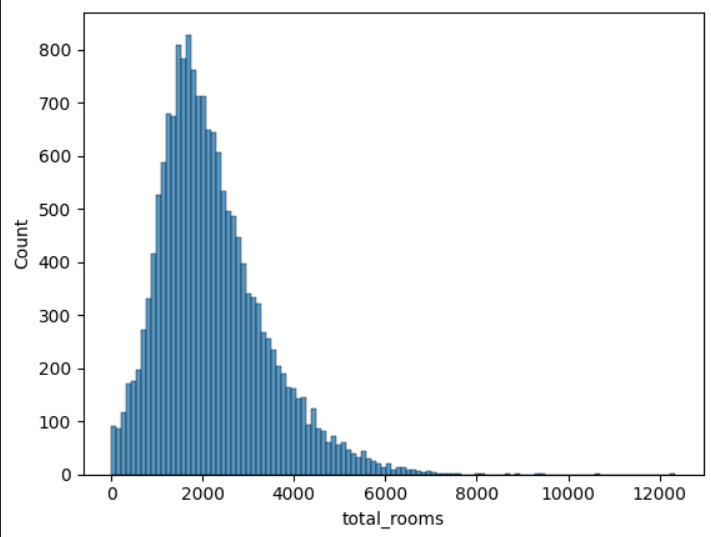

#### After dropping rows of "median_house_value" that is more than 500001:
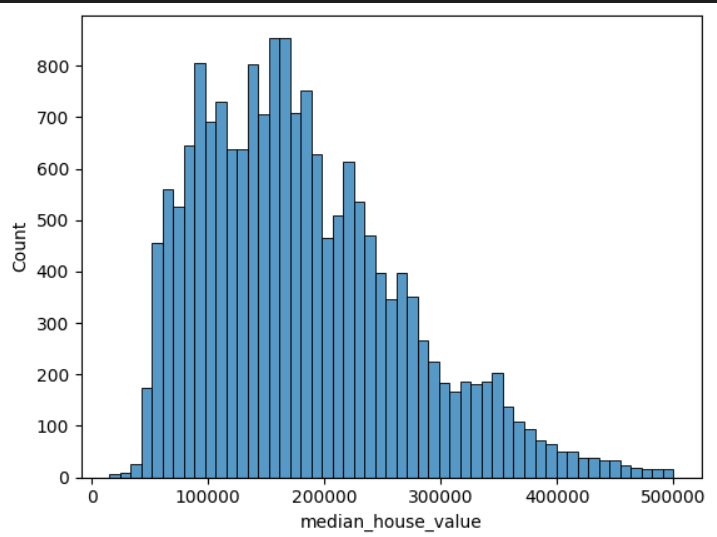
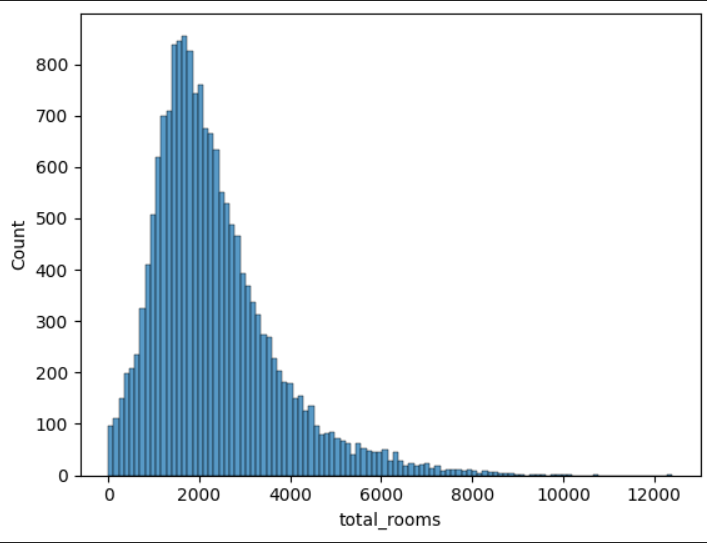

#### #### All optimization of the housing dataset you can see in this file: C:\Storage\Studies\Lapland_AMK\6_semester\Advanced_ML\Project_1\regression\data_pre_processing.ipynb

#### Results using "processed_regression_housing.csv":<br>
 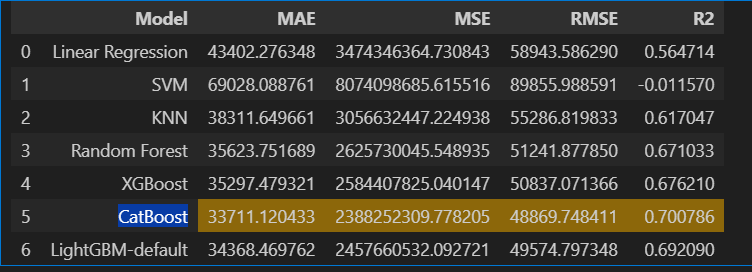<br>
Results using "housing_pre_target_trim.csv":<br>
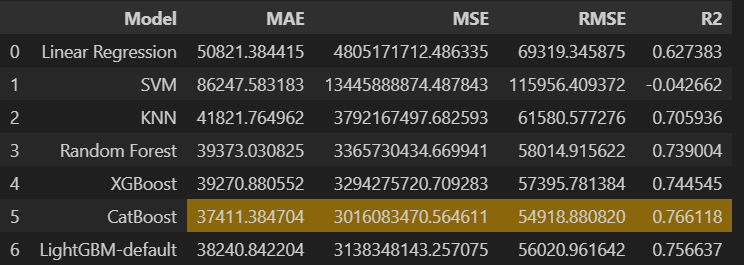<br>
Results using "housing_before_optimization.csv":<br>
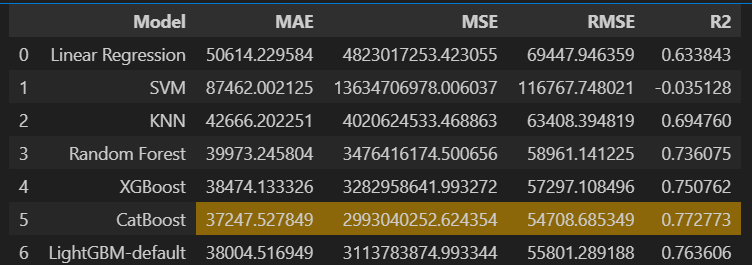<br>

#### the results are showing that CatBoost is the best model andwe an see that less cleaning = better results, especially for CatBoost, XGBoost, Random Forest, LightGBM. Amount of rows in each df version have sense, the more rows the df has the better result of ML. We have a difference of about 3 800 rows between best and worst results. Probable, by dropping rows of the target variable, I dropped important rows as they are informative for ML. So, df before optimization (RANSAC + MAD + Isolation Forest) resulted in the best overall performance - higher R2. Target trimming negatively effected model performance, the model shows the worse results in this case. 

### Level 2 of Exercise project

#### I will find best parameters for worse and best case (using two versions of df) by using LightGBM algorithms
#### 1. DF: "processed_regression_housing.csv",<br> Tool:hyperparameter_optimization_LightGBM:<br>Best parameters from RandomizedSearchCV: {'learning_rate': np.float64(0.08948275862068966), 'max_depth': 17, 'num_leaves': 48}<br>
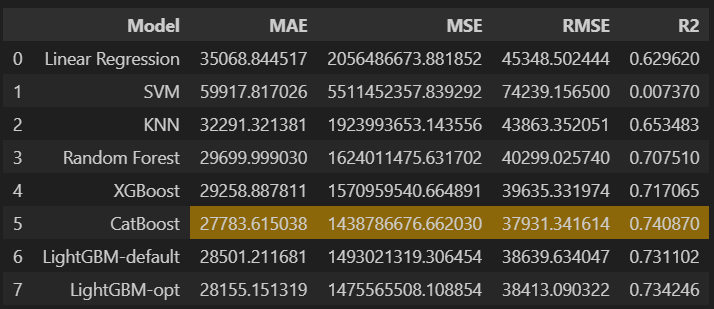

#### 2. DF: "housing_before_optimization.csv",<br> Tool:hyperparameter_optimization_LightGBM:<br>Best parameters from RandomizedSearchCV: {'learning_rate': np.float64(0.13120689655172416), 'max_depth': 23, 'num_leaves': 46}<br>
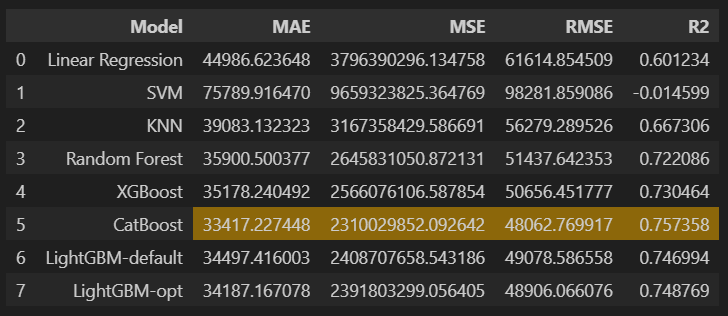

#### We can see that in first case using "processed_regression_housing.csv" the R2 score of LightGBM model improved significantly, increasing from 0.69 to 0.75 after hyperparameter tuning. This means that parameter optimization was beneficial for this dataset. But on the other hand, for the df  "housing_before_optimization.csv", the R2 score declined slightly, from 0.76 to 0.75.  It means that finding best parameters makes sense for the model that uses "processed_regression_housing.csv" but other model it has no sense. Looks like hyperparameter optimization does not always result in parameters that work the best. 

#### Next, I will find the best parameters using CatBoost algorithms (using two versions of df):
#### 1. DF: "processed_regression_housing.csv",<br> Tool:hyperparameter_optimization_CatBoost:<br>Best parameters: {'depth': 7, 'iterations': 1199, 'l2_leaf_reg': np.float64(5.778919229638712), 'learning_rate': np.float64(0.045241217646849234)}<br>Best CV score (neg MSE): -1539596482.1394653
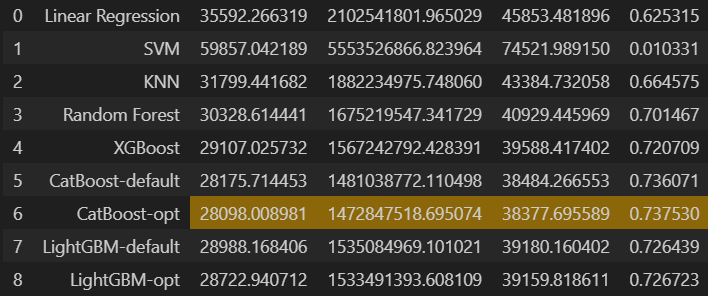<br>
#### 2. DF: "housing_before_optimization.csv",<br> Tool:hyperparameter_optimization_LightGBM:<br>Best parameters: {'depth': 8, 'iterations': 944, 'l2_leaf_reg': np.float64(5.08618378675995), 'learning_rate': np.float64(0.05250387504557257)} <br>Best CV score (neg MSE): -2547064787.5312743<br>

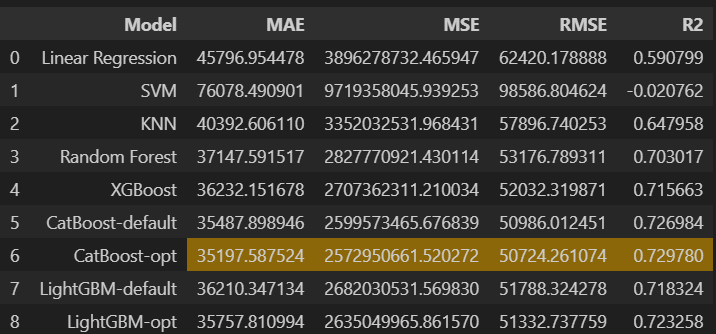

#### Hyperparameter optimization improved CatBoost performance but very slightly. Default CatBoost parameters already provided almost optimal performance. Surprisingly, after applying the best hyperparameters for LightGBM, the CatBoost model achieved its best performance with an R2 score of 0.76. However, even after applying CatBoosts  own optimized hyperparameters, the model did not reach the same level of performance. 

### Level 3

#### DF - "processed_regression_housing.csv", meta model - CatBoostRegressor<br>
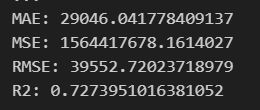<br>
#### In this experiment, stacking did not outperform the best model - CatBoost-opt. Stacking model R2: 0.73 vs CatBoost-opt r2:0.74. I expected better results, so why it happened, AI suggested that -  this is expected when one algorithm already captures most of the signal and the additional base models are weaker or provide redundant predictions. Stacking tends to help most when base learners are both strong and diverse, and when their errors complement each other.<br>

#### DF - "housing_before_optimization.csv", meta model - CatBoostRegressor<br>
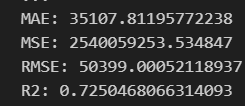<br>
#### Stacking model R2: 0.73 vs CatBoost-opt r2:0.76. So stacking is about 0.03 worse than the best single model. This was not was I expected. According to AI, there are can be few reasons why it has happened: 1 - CatBoost already captures most of the signal, 2 - Base models (XGB, RF, LightGBM ) are weaker than CatBoost. This pulls the final prediction away from CatBoost-opt.3- Stacking works best with complementary errors.